In [1]:
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
# Plotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.ion()

plt.close('all')

In [3]:
mr_overview = pickle.load(open('mr_overview.pkl', 'rb'))

In [4]:
mr_overview['LHCMD4'].keys()

dict_keys(['sigma_t', 'mu0', 'ampl', 'timestamp_float'])

In [5]:
bunch_length = mr_overview['LHCMD4']['sigma_t']
timestamps = mr_overview['LHCMD4']['timestamp_float']

In [6]:
t_corr = 2*3600
acq = timestamps
my_title = str(datetime.fromtimestamp(timestamps[0]))[:10] # Y-M-D

In [7]:
my_time = md.epoch2num(acq+t_corr)[120:300] # Convert UNIX time to days since Matplotlib epoch.
bunch_length_cut = bunch_length[120:300]

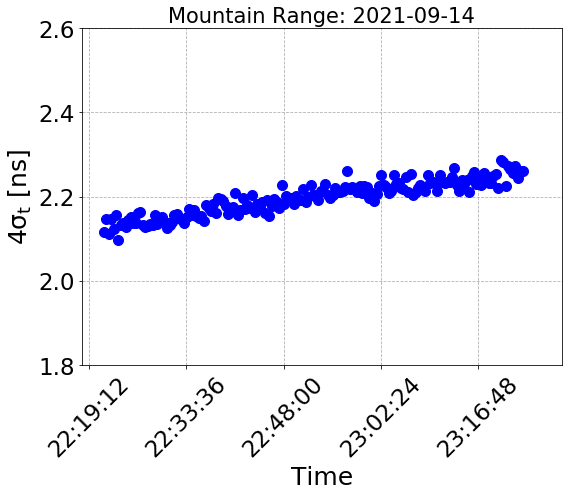

In [8]:
fig, ax = plt.subplots(1)

xfmt = md.DateFormatter('%H:%M:%S')
ax.plot(my_time, bunch_length_cut*4, 'o', c='b')
ax.set_ylim(1.8, 0.65*4)
ax.set_xlabel('Time')
ax.set_ylabel('$\mathrm{4 \sigma_t \ [ns]}$')
ax.set_title(f'Mountain Range: {my_title}')

plt.setp(ax.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(xfmt)
plt.grid(ls='--')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/MR_{my_title}.png', bbox_inches='tight')